In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import plotly.graph_objects as go
import warnings
import math
import astropy.constants as const
warnings.filterwarnings("ignore")

earth_Mass = const.M_earth.value*1000 #g
earth_Radius = const.R_earth.value*100
earth_Volume = 4/3 * math.pi * earth_Radius**3
earth_density = earth_Mass / earth_Volume
from IPython.display import clear_output


In [2]:
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")
dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])

earth_like_rocky  = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")
H20_50_500K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_500 K_1mili-bar surface temprture.txt",delimiter = "\t")

In [3]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc
pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature
disc_year_EA         = dataEA.disc_year

# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature
st_eff_EA            = dataEA.st_teff            # Star effective temprature
st_eff_up_EA         = dataEA.st_tefferr1        # Star upper err effective temprature
st_eff_low_EA        = dataEA.st_tefferr2        # Star lower err effective temprature
for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] == 'CD-60 8051 b':
        planet_name_LI[i] = 'L 168-9 b'
    if planet_name_LI[i] == 'GJ 3053 b':
        planet_name_LI[i] = 'LHS 1140 b'
    if planet_name_LI[i] == 'GJ 3053 c':
        planet_name_LI[i] = 'LHS 1140 c'

##### Use the Luque values for planets in that sample #### 
for i in range(0,len(planet_name_EA)):
    if planet_name_EA[i] in planet_name_LI:
        LI_index              = planet_name_LI.index(planet_name_EA[i])
        
        pl_eq_EA[i]           = pl_eq_LI[LI_index]
        mass_EA[i]            = mass_LI[LI_index]
        mass_unc_up_EA[i]     = mass_unc_up_LI[LI_index]
        mass_unc_low_EA[i]    = mass_unc_low_LI[LI_index]
        
        radius_EA[i]          = radius_LI[LI_index]
        radius_unc_up_EA[i]   = radius_unc_up_LI[LI_index]      
        radius_unc_low_EA[i]  = radius_unc_low_LI[LI_index]    

        density_EA[i]         = density_LI[LI_index]  
        density_unc_up_EA[i]  = density_unc_up_LI[LI_index]  
        density_unc_low_EA[i] = density_unc_low_LI[LI_index] 
        st_spectype_EA[i]     = "M"

# Filters

### Choose LIV34

In [4]:
def liv34(EA_planets):
    LIV34_planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'LHS 1140 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'L 168-9 b', 'L 98-59 c', 'L 98-59 d', 'LHS 1140 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b'] 
    planet      = []; planet_i      = []; planet_eq   = []
    disc_year   = []; st_eff        = []
    radius      = []; radius_up     = []; radius_low  = []
    mass        = []; mass_up       = []; mass_low    = []
    density     = []; density_up    = []; density_low = []
    
    for i in range(0,len(EA_planets)):
        if EA_planets[i] in LIV34_planets:
            index  = list(planet_name_EA).index(EA_planets[i]); planet.append(dataEA.pl_name[index])
            planet_eq.append(pl_eq_EA[i]); st_eff.append(st_eff_EA[i])
            disc_year.append(disc_year_EA[i])
            radius.append(dataEA.pl_rade[index]); radius_up.append(dataEA.pl_radeerr1[index]); radius_low.append(dataEA.pl_radeerr2[index])
            density.append(dataEA.pl_dens[index]); density_up.append(dataEA.pl_denserr1[index]); density_low.append(dataEA.pl_denserr2[index])
            mass.append(dataEA.pl_bmasse[index]); mass_up.append(dataEA.pl_bmasseerr1[index]);  mass_low.append(dataEA.pl_bmasseerr2[index])
    return index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq,disc_year, st_eff

## Plot data

In [8]:
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq,disc_year,st_eff = liv34(planet_name_EA)
planet2      = []; planet_i2       = []; planet_eq2   = []
disc_year2   = []; st_eff2         = []
radius2      = []; radius_up2      = []; radius_low2  = []
mass2        = []; mass_up2        = []; mass_low2    = []
density2     = []; density_up2     = []; density_low2 = []

radius2 = []
planet2 = []
for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.08:
        if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.25:
            if planet_name_EA[i] not in planet:
                if radius_EA[i]<4:
                    if "M" in str(st_spectype_EA[i]) or st_eff_EA[i] < 3500:
                        if st_eff_EA[i] < max(st_eff):
                            st_eff2.append(st_eff_EA[i])
                            planet_eq2.append(pl_eq_EA[i]); planet2.append(planet_name_EA[i]); disc_year2.append(disc_year_EA[i])
                            radius2.append(dataEA.pl_rade[i]); radius_up2.append(dataEA.pl_radeerr1[i]); radius_low2.append(dataEA.pl_radeerr2[i])
                            density2.append(dataEA.pl_dens[i]); density_up2.append(dataEA.pl_denserr1[i]); density_low2.append(dataEA.pl_denserr2[i])
                            mass2.append(dataEA.pl_bmasse[i]); mass_up2.append(dataEA.pl_bmasseerr1[i]);  mass_low2.append(dataEA.pl_bmasseerr2[i])                
                
mass_error_plus = mass_up
mass_error_minus = np.abs(mass_low)
radius_error_plus = radius_up
radius_error_minus = np.abs(radius_low)
density_error_plus = np.divide(density_up,earth_density)
density_error_minus = np.divide(np.abs(density_low),earth_density)
planet_eq = planet_eq 

mass_error_plus2 = mass_up2
mass_error_minus2 = np.abs(mass_low2)
density_error_plus2 = np.divide(density_up2,earth_density)
density_error_minus2= np.divide(np.abs(density_low2),earth_density)
radius_error_plus2 = radius_up2
radius_error_minus2 = np.abs(radius_low2)

planet3      = []; planet_i3       = []; planet_eq3   = []; disc_year3 = []
radius3      = []; radius_up3      = []; radius_low3  = []; st_eff3    = []
mass3        = []; mass_up3        = []; mass_low3    = []
density3     = []; density_up3     = []; density_low3 = []
for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and  radius_EA[i]<4 and "M" in str(st_spectype_EA[i]):
        if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
            if planet_name_EA[i] not in planet and planet_name_EA[i] not in planet2:
                st_eff3.append(st_eff_EA[i])
                planet_eq3.append(pl_eq_EA[i]); planet3.append(planet_name_EA[i]); disc_year3.append(disc_year_EA[i])
                radius3.append(dataEA.pl_rade[i]); radius_up3.append(dataEA.pl_radeerr1[i]); radius_low3.append(dataEA.pl_radeerr2[i])
                density3.append(dataEA.pl_dens[i]); density_up3.append(dataEA.pl_denserr1[i]); density_low3.append(dataEA.pl_denserr2[i])
                mass3.append(dataEA.pl_bmasse[i]); mass_up3.append(dataEA.pl_bmasseerr1[i]);  mass_low3.append(dataEA.pl_bmasseerr2[i])

mass_error_plus3    = mass_up3
mass_error_minus3   = np.abs(mass_low3)
density_error_plus3 = np.divide(density_up3,earth_density)
density_error_minus3= np.divide(np.abs(density_low3),earth_density)
radius_error_plus3  = radius_up3
radius_error_minus3 = np.abs(radius_low3)

planet4      = []; planet_i4       = []; planet_eq4   = []; disc_year4 = []
radius4      = []; radius_up4      = []; radius_low4  = []; st_eff4    = []
mass4        = []; mass_up4        = []; mass_low4    = []
density4     = []; density_up4     = []; density_low4 = []
for i in range(0,len(planet_name_EA)):
    if ((density_unc_up_EA[i] + density_unc_up_EA[i])*0.5) / density_EA[i] < 0.33 and  radius_EA[i]<4 and "M" in str(st_spectype_EA[i]):
        if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
            if planet_name_EA[i] not in planet and planet_name_EA[i] not in planet2 and planet_name_EA[i] not in planet3:
                st_eff4.append(st_eff_EA[i])
                planet_eq4.append(pl_eq_EA[i]); planet4.append(planet_name_EA[i]); disc_year4.append(disc_year_EA[i])
                radius4.append(dataEA.pl_rade[i]); radius_up4.append(dataEA.pl_radeerr1[i]); radius_low4.append(dataEA.pl_radeerr2[i])
                density4.append(dataEA.pl_dens[i]); density_up4.append(dataEA.pl_denserr1[i]); density_low4.append(dataEA.pl_denserr2[i])
                mass4.append(dataEA.pl_bmasse[i]); mass_up4.append(dataEA.pl_bmasseerr1[i]);  mass_low4.append(dataEA.pl_bmasseerr2[i])

mass_error_plus4    = mass_up4
mass_error_minus4   = np.abs(mass_low4)
density_error_plus4 = np.divide(density_up4,earth_density)
density_error_minus4= np.divide(np.abs(density_low4),earth_density)
radius_error_plus4  = radius_up4
radius_error_minus4 = np.abs(radius_low4)


planet5      = []; planet_i5       = []; planet_eq5   = []; disc_year5 = []
radius5      = []; radius_up5      = []; radius_low5  = []; st_eff5    = []
mass5        = []; mass_up5        = []; mass_low5    = []
density5     = []; density_up5     = []; density_low5 = []
for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and radius_EA[i]<4 and st_eff_EA[i] <= 3500:
        if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
            if planet_name_EA[i] not in planet:
                st_eff5.append(st_eff_EA[i])
                planet_eq5.append(pl_eq_EA[i]); planet5.append(planet_name_EA[i]); disc_year5.append(disc_year_EA[i])
                radius5.append(dataEA.pl_rade[i]); radius_up5.append(dataEA.pl_radeerr1[i]); radius_low5.append(dataEA.pl_radeerr2[i])
                density5.append(dataEA.pl_dens[i]); density_up5.append(dataEA.pl_denserr1[i]); density_low5.append(dataEA.pl_denserr2[i])
                mass5.append(dataEA.pl_bmasse[i]); mass_up5.append(dataEA.pl_bmasseerr1[i]);  mass_low5.append(dataEA.pl_bmasseerr2[i])

mass_error_plus5    = mass_up5
mass_error_minus5   = np.abs(mass_low5)
density_error_plus5 = np.divide(density_up5,earth_density)
density_error_minus5= np.divide(np.abs(density_low5),earth_density)
radius_error_plus5  = radius_up5
radius_error_minus5 = np.abs(radius_low5)

relative_mass_error1 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass, mass_error_plus)]
relative_density_error1 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density, earth_density), density_error_plus)]
relative_radius_error1 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius, radius_error_plus)]

relative_mass_error2 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass2, mass_error_plus2)]
relative_density_error2 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density2, earth_density), density_error_plus2)]
relative_radius_error2 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius2, radius_error_plus2)]

relative_mass_error3 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass3, mass_error_plus3)]
relative_density_error3 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density3, earth_density), density_error_plus3)]
relative_radius_error3 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius3, radius_error_plus3)]

relative_mass_error4 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass4, mass_error_plus4)]
relative_density_error4 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density4, earth_density), density_error_plus4)]
relative_radius_error4 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius4, radius_error_plus4)]

relative_mass_error5 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass5, mass_error_plus5)]
relative_density_error5 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density5, earth_density), density_error_plus5)]
relative_radius_error5 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius5, radius_error_plus5)]

solar_system_name       = ["MERCURY","Venus","EARTH","MOON","MARS","JUPITER","SATURN","URANUS","NEPTUNE","PLUTO"] 
solar_system_mass       = np.array([0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130])/5.97        # Earth masses
solar_system_radius     = np.array([4879,12104,12756,3475,6792,142984,120536,51118,49528,2376])/12756 # km
solar_system_density    = np.array([5429,5243,5514,3340,3934,1326,687,1270,1638,1850])/5514


In [9]:
notes5 = list(np.zeros(len(planet5)))
for i in range(0,len(planet5)):
    if planet5[i] == "LP 791-18 c":
        notes5[i] = "Mass published in 2023"
    elif planet5[i] =="LTT 1445 A b" or planet5[i] =="LTT 1445 A c":
        notes5[i] = "Double / (triple?) star system"
    else:
        notes5[i] = "--"
        
notes2 = list(np.zeros(len(planet2)))
for i in range(0,len(planet2)):
    if planet2[i] == "HD 260655 b" or planet2[i] == "HD 260655 b":
        notes2[i] = "Luque paper from 2022"
    elif planet2[i] =="Kepler-26 b" or planet2[i] =="Kepler-26 c" or planet2[i] == "Kepler-94 b":
        notes2[i] = "Double / (triple?) star system"
    elif planet2[i] =="LP 791-18 c":
        notes2[i] = "Radius precision better in Peterson et. al 2023"
    elif planet2[i] =="LTT 1445 A b" or  planet2[i] =="LTT 1445 A c":
        notes2[i] = "Double / (triple?) star system"
    else:
        notes2[i] = "--"
        
hover_text1 = [
    f"Dataset: LIV34<br>Planet: {planet[i]}<br>Mass: {mass[i]} +{mass_error_plus[i]:.2f} -{mass_error_minus[i]:.2f} ({relative_mass_error1[i]*100:.2f}% relative error) <br>Density: {density[i]:.2f} +{density_up[i]:.2f} -{density_low[i]:.2f} ({relative_density_error1[i]*100:.2f}% relative error) <br>Radius: {radius[i]} +{radius_error_plus[i]:.2f} -{radius_error_minus[i]:.2f} ({relative_radius_error1[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq[i]} K<br>Discovery Year: {disc_year[i]}<br>Stellar Effective Temperature: {st_eff[i]}K"
    for i in range(len(mass))
]
hover_textRM1 = [
    f"Dataset: LIV34<br>Planet: {planet[i]}<br>Mass: {mass[i]} +{mass_error_plus[i]:.2f} -{mass_error_minus[i]:.2f} ({relative_mass_error1[i]*100:.2f}% relative error)<br>Density: {density[i]:.2f} +{(density_up[i]*earth_density):.2f} -{(density_low[i]*earth_density):.2f} ({relative_density_error1[i]*100:.2f}% relative error)<br>Radius: {radius[i]} +{radius_error_plus[i]:.2f} -{radius_error_minus[i]:.2f} ({relative_radius_error1[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq[i]} K<br>Discovery Year: {disc_year[i]}<br>Stellar Effective Temperature: {st_eff[i]}K"
    for i in range(len(mass))
]

hover_text2 = [
    f"Dataset: EA add<br>Planet: {planet2[i]}<br>Mass: {mass2[i]} +{mass_error_plus2[i]:.2f} -{mass_error_minus2[i]:.2f} ({relative_mass_error2[i]*100:.2f}% relative error)<br>Density: {density2[i]:.2f} +{density_up2[i]:.2f} -{abs(density_low2[i]):.2f} ({relative_density_error2[i]*100:.2f}% relative error)<br>Radius: {radius2[i]} +{radius_error_plus2[i]:.2f} -{radius_error_minus2[i]:.2f} ({relative_radius_error2[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq2[i]} K<br>Discovery Year: {disc_year2[i]}<br>Stellar Effective Temperature: {st_eff2[i]}K<br>Notes: {notes2[i]}"
    for i in range(len(mass2))
]

hover_textRM2 = [
    f"Dataset: EA add<br>Planet: {planet2[i]}<br>Mass: {mass2[i]} +{mass_error_plus2[i]:.2f} -{mass_error_minus2[i]:.2f} ({relative_mass_error2[i]*100:.2f}% relative error)<br>Density: {density2[i]:.2f} +{density_up2[i]:.2f} -{abs(density_low2[i]):.2f} ({relative_density_error2[i]*100:.2f}% relative error)<br>Radius: {radius2[i]} +{radius_error_plus2[i]:.2f} -{radius_error_minus2[i]:.2f} ({relative_radius_error2[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq2[i]} K<br>Discovery Year: {disc_year2[i]}<br>Stellar Effective Temperature: {st_eff2[i]}K<br>Notes: {notes2[i]}"
    for i in range(len(mass2))
]

hover_text3 = [
    f"Dataset: EA add 33% (C:RM)<br>Planet: {planet3[i]}<br>Mass: {mass3[i]} +{mass_error_plus3[i]:.2f} -{mass_error_minus3[i]:.2f} ({relative_mass_error3[i]*100:.2f}% relative error)<br>Density: {density3[i]:.2f} +{density_up3[i]:.2f} -{abs(density_low3[i]):.2f} ({relative_density_error3[i]*100:.2f}% relative error)<br>Radius: {radius3[i]} +{radius_error_plus3[i]:.2f} -{radius_error_minus3[i]:.2f} ({relative_radius_error3[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq3[i]} K<br>Discovery Year: {disc_year3[i]}<br>Stellar Effective Temperature: {st_eff3[i]}K"
    for i in range(len(mass3))
]

hover_textRM3 = [
    f"Dataset: EA add 33% (C:RM)<br>Planet: {planet3[i]}<br>Mass: {mass3[i]} +{mass_error_plus3[i]:.2f} -{mass_error_minus3[i]:.2f} ({relative_mass_error3[i]*100:.2f}% relative error)<br>Density: {density3[i]:.2f} +{density_up3[i]:.2f} -{abs(density_low3[i]):.2f} ({relative_density_error3[i]*100:.2f}% relative error)<br>Radius: {radius3[i]} +{radius_error_plus3[i]:.2f} -{radius_error_minus3[i]:.2f} ({relative_radius_error3[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq3[i]} K<br>Discovery Year: {disc_year3[i]}<br>Stellar Effective Temperature: {st_eff3[i]}K"
    for i in range(len(mass3))
]

hover_text4 = [
    f"Dataset:EA add 33% (C:DM)<br>Planet: {planet4[i]}<br>Mass: {mass4[i]} +{mass_error_plus4[i]:.2f} -{mass_error_minus4[i]:.2f} ({relative_mass_error4[i]*100:.2f}% relative error)<br>Density: {density4[i]:.2f} +{density_up4[i]:.2f} -{abs(density_low4[i]):.2f} ({relative_density_error4[i]*100:.2f}% relative error)<br>Radius: {radius4[i]} +{radius_error_plus4[i]:.2f} -{radius_error_minus4[i]:.2f} ({relative_radius_error4[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq4[i]} K<br>Discovery Year: {disc_year4[i]}<br>Stellar Effective Temperature: {st_eff4[i]}K"
    for i in range(len(mass4))
]

hover_textRM4 = [
    f"Dataset: EA add 33% (C:DM)<br>Planet: {planet4[i]}<br>Mass: {mass4[i]} +{mass_error_plus4[i]:.2f} -{mass_error_minus4[i]:.2f} ({relative_mass_error4[i]*100:.2f}% relative error)<br>Density: {density4[i]:.2f} +{density_up4[i]:.2f} -{abs(density_low4[i]):.2f} ({relative_density_error4[i]*100:.2f}% relative error)<br>Radius: {radius4[i]} +{radius_error_plus4[i]:.2f} -{radius_error_minus4[i]:.2f} ({relative_radius_error4[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq4[i]} K<br>Discovery Year: {disc_year4[i]}<br>Stellar Effective Temperature: {st_eff4[i]}K"
    for i in range(len(mass4))
]

hover_text5 = [
    f"Dataset: EA add 3500K<br>Planet: {planet5[i]}<br>Mass: {mass5[i]} +{mass_error_plus5[i]:.2f} -{mass_error_minus5[i]:.2f} ({relative_mass_error5[i]*100:.2f}% relative error)<br>Density: {density5[i]:.2f} +{density_up5[i]:.2f} -{abs(density_low5[i]):.2f} ({relative_density_error5[i]*100:.2f}% relative error)<br>Radius: {radius5[i]} +{radius_error_plus5[i]:.2f} -{radius_error_minus5[i]:.2f} ({relative_radius_error5[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq5[i]} K<br>Discovery Year: {disc_year5[i]}<br>Stellar Effective Temperature: {st_eff5[i]}K<br>Notes: {notes5[i]}"
    for i in range(len(mass5))
]

hover_textRM5 = [
    f"Dataset: EA add 3500K<br>Planet: {planet5[i]}<br>Mass: {mass5[i]} +{mass_error_plus5[i]:.2f} -{mass_error_minus5[i]:.2f} ({relative_mass_error5[i]*100:.2f}% relative error)<br>Density: {density5[i]:.2f} +{density_up5[i]:.2f} -{abs(density_low5[i]):.2f} ({relative_density_error5[i]*100:.2f}% relative error)<br>Radius: {radius5[i]} +{radius_error_plus5[i]:.2f} -{radius_error_minus5[i]:.2f} ({relative_radius_error5[i]*100:.2f}% relative error) <br>Effective Temperature: {planet_eq5[i]} K<br>Discovery Year: {disc_year5[i]}<br>Stellar Effective Temperature: {st_eff5[i]}K<br>Notes: {notes5[i]}"
    for i in range(len(mass5))
]

hover_textSS = [
    f"Planet: {solar_system_name[i]}<br>Mass (Earth Masses): {solar_system_mass[i]}<br>Density (Earth Densities): {solar_system_density[i]:.2f}<br>Radius (Earth Radii): {solar_system_radius[i]}"
    for i in range(len(solar_system_name))
]



In [11]:
scatter1 = go.Scatter(
    x=mass,
    y=np.divide(density, earth_density),
    mode='markers',
    name='LIV34',
    text=hover_text1,
    error_x=dict(type='data', array=mass_error_plus, arrayminus=mass_error_minus, visible=True),
    error_y=dict(type='data', array=density_error_plus, arrayminus=density_error_minus, visible=True),
    marker=dict(
        color=planet_eq,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',
        showscale=True,
        line=dict(color='DarkSlateGrey', width=2)  # Add this line for edgecolor
    )
)
scatter1.marker['size'] = 12  # Adjust the size of the markers
scatter1.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter1.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)


scatterRM1 = go.Scatter(
    x=mass,
    y=radius,
    mode='markers',
    name='LIV34',
    text=hover_textRM1,
    error_x=dict(type='data', array=mass_error_plus, arrayminus=mass_error_minus, visible=True),
    error_y=dict(type='data', array=radius_error_plus, arrayminus=radius_error_minus, visible=True),
    marker=dict(
        color=planet_eq,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',
        showscale=True,
        line=dict(color='DarkSlateGrey', width=2)  # Add this line for edgecolor
    )
)
scatterRM1.marker['size'] = 12  # Adjust the size of the markers
scatterRM1.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM1.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatter2 = go.Scatter(
    x=mass2,
    y=np.divide(density2, earth_density),
    mode='markers',
    name='EA add',
    text=hover_text2,
    error_x=dict(type='data', array=mass_error_plus2, arrayminus=mass_error_minus2, visible=True),
    error_y=dict(type='data', array=density_error_plus2, arrayminus=density_error_minus2, visible=True),
    marker=dict(
        color=planet_eq2,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',
        showscale=True,
        line=dict(color='Red', width=2)  # Add this line for edgecolor
    )
)
scatter2.marker['size'] = 12  # Adjust the size of the markers
scatter2.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter2.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatterRM2 = go.Scatter(
    x=mass2,
    y=radius2,
    mode='markers',
    name='EA add',
    text=hover_textRM2,
    error_x=dict(type='data', array=mass_error_plus2, arrayminus=mass_error_minus2, visible=True),
    error_y=dict(type='data', array=radius_error_plus2, arrayminus=radius_error_minus2, visible=True),
    marker=dict(
        color=planet_eq2,
        colorbar=dict(title='Temperature'),
        colorscale='Inferno',
        showscale=True,
        line=dict(color='Red', width=2)  # Add this line for edgecolor
    )
)
scatterRM2.marker['size'] = 12  # Adjust the size of the markers
scatterRM2.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM2.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatter3 = go.Scatter(
    x=mass3,
    y=np.divide(density3, earth_density),
    mode='markers',
    name='EA add 33% (C: RM)',
    text=hover_text3,
    error_x=dict(type='data', array=mass_error_plus3, arrayminus=mass_error_minus3, visible=True),
    error_y=dict(type='data', array=density_error_plus3, arrayminus=density_error_minus3, visible=True),
    marker=dict(color=planet_eq3, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatter3.marker['size'] = 12  # Adjust the size of the markers
scatter3.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter3.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatterRM3 = go.Scatter(
    x=mass3,
    y=radius3,
    mode='markers',
    name='EA add 33% (C: RM)',
    text=hover_textRM3,
    error_x=dict(type='data', array=mass_error_plus3, arrayminus=mass_error_minus3, visible=True),
    error_y=dict(type='data', array=radius_error_plus3, arrayminus=radius_error_minus3, visible=True),
    marker=dict(color=planet_eq3, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatterRM3.marker['size'] = 12  # Adjust the size of the markers
scatterRM3.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM3.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatter4 = go.Scatter(
    x=mass4,
    y=np.divide(density4, earth_density),
    mode='markers',
    name='EA add 33% (C: DM)',
    text=hover_text4,
    error_x=dict(type='data', array=mass_error_plus4, arrayminus=mass_error_minus4, visible=True),
    error_y=dict(type='data', array=density_error_plus4, arrayminus=density_error_minus4, visible=True),
    marker=dict(color=planet_eq4, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatter4.marker['size'] = 12  # Adjust the size of the markers
scatter4.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter4.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatterRM4 = go.Scatter(
    x=mass4,
    y=radius4,
    mode='markers',
    name='EA add 33% (C: DM)',
    text=hover_textRM4,
    error_x=dict(type='data', array=mass_error_plus4, arrayminus=mass_error_minus4, visible=True),
    error_y=dict(type='data', array=radius_error_plus4, arrayminus=radius_error_minus4, visible=True),
    marker=dict(color=planet_eq4, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatterRM4.marker['size'] = 12  # Adjust the size of the markers
scatterRM4.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM4.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatter5 = go.Scatter(
    x=mass5,
    y=np.divide(density5, earth_density),
    mode='markers',
    name='EA add 3500K',
    text=hover_text5,
    error_x=dict(type='data', array=mass_error_plus5, arrayminus=mass_error_minus5, visible=True),
    error_y=dict(type='data', array=density_error_plus5, arrayminus=density_error_minus5, visible=True),
    marker=dict(color=planet_eq5, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatter5.marker['size'] = 12  # Adjust the size of the markers
scatter5.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatter5.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

scatterRM5 = go.Scatter(
    x=mass5,
    y=radius5,
    mode='markers',
    name='EA add 3500K',
    text=hover_textRM5,
    error_x=dict(type='data', array=mass_error_plus5, arrayminus=mass_error_minus5, visible=True),
    error_y=dict(type='data', array=radius_error_plus5, arrayminus=radius_error_minus5, visible=True),
    marker=dict(color=planet_eq5, colorbar=dict(title='Temperature'), colorscale='Inferno', showscale=True)
)
scatterRM5.marker['size'] = 12  # Adjust the size of the markers
scatterRM5.error_x['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)
scatterRM5.error_y['color'] = 'rgba(169, 169, 169, 0.7)'  # Adjust the color of the error bars (grey)

color_axis = dict(
    cmin=min(planet_eq),
    cmax=max(planet_eq3),
    color=planet_eq,
    colorbar=dict(title='Temperature', titleside='right'),  # Adjust titleside as needed
    colorscale='Inferno',
    showscale=True
)
earth_like_trace = go.Scatter(
    x=list(earth_like_rocky["Mass"]),
    y=list(earth_like_rocky["Radius"]),
    mode='lines',
    name='Earth-like',
    line=dict(width=2),  # Adjust line attributes as needed
)


h20_trace = go.Scatter(
    x=H20_50_500K["Mass"],
    y=H20_50_500K["Radius"],  # Replace with your actual data
    mode='lines',
    name='50% H2O (500K)',  # Give your line plot a name
    line=dict(width=2)  # Adjust line attributes as needed
)
masses_ = np.linspace(0,30,500)
radiii  = 1.24 * np.power(masses_,1/3.7)
h20_trace_calc = go.Scatter(
    x=masses_,
    y=radiii,
    mode='lines',
    name='50% H2O equation',  # Give your line plot a name
    line=dict(width=2)  # Adjust line attributes as needed
)

earth_like_rocky_mass    = earth_Mass*np.array(earth_like_rocky["Mass"])
earth_like_rocky_radius  = earth_Radius*np.array(earth_like_rocky["Radius"])
earth_like_rocky_density = (earth_like_rocky_mass) / ((4/3)*(np.pi)*(np.power(earth_like_rocky_radius,3))   ) 

earth_like_trace_DM = go.Scatter(
    x=list(earth_like_rocky["Mass"]),
    y=earth_like_rocky_density/earth_density,
    mode='lines',
    name='Earth-like',
    line=dict(width=2),  # Adjust line attributes as needed
)


H20_50_500K_mass         = earth_Mass*np.array(H20_50_500K["Mass"])
H20_50_500K_radius       = earth_Radius*np.array(H20_50_500K["Radius"])
H20_50_500K_density      = (H20_50_500K_mass) / ((4/3)*(np.pi)*(np.power(H20_50_500K_radius,3))   )

h20_trace_DM = go.Scatter(
    x=H20_50_500K["Mass"],
    y=H20_50_500K_density/earth_density,  # Replace with your actual data
    mode='lines',
    name='50% H2O (500K)',  # Give your line plot a name
    line=dict(width=2)  # Adjust line attributes as needed
)

masses_ = np.linspace(0.01,30,500)
radiii  = 1.24 * np.power(masses_,1/3.7)
H20_50_calc_mass         = earth_Mass*masses_
H20_50_calc_radius       = earth_Radius*radiii
H20_50_calc_density      = (H20_50_calc_mass) / ((4/3)*(np.pi)*(np.power(H20_50_calc_radius,3))   )

h20_trace_calc_DM = go.Scatter(
    x=masses_[1:500],
    y=[H20_50_calc_density/earth_density][0][1:500],
    mode='lines',
    name='50% H2O equation',  # Give your line plot a name
    line=dict(width=2)  # Adjust line attributes as needed
)

solar_system_DM = go.Scatter(
    x=solar_system_mass,
    y=solar_system_density,
    mode='markers',
    name='Solar System',  # Give your line plot a name
    text=hover_textSS,
)
solar_system_DM.marker['size'] = 18  # Adjust the size of the markers

solar_system_RM = go.Scatter(
    x=solar_system_mass,
    y=solar_system_radius,
    mode='markers',
    name='Solar System',  # Give your line plot a name
    text=hover_textSS,
)
solar_system_RM.marker['size'] = 18  # Adjust the size of the markers

# Add the Earth-like trace to your existing Plotly figure
fig = go.Figure(layout_xaxis_range=[0,35])
fig.add_trace(earth_like_trace)
fig.add_trace(h20_trace)
fig.add_trace(h20_trace_calc)
fig.add_trace(earth_like_trace_DM)
fig.add_trace(h20_trace_DM)
fig.add_trace(h20_trace_calc_DM)
fig.add_trace(scatter1)
fig.add_trace(scatterRM1)
fig.add_trace(scatter2)
fig.add_trace(scatterRM2)
fig.add_trace(scatter3)
fig.add_trace(scatterRM3)
fig.add_trace(scatter4)
fig.add_trace(scatterRM4)
fig.add_trace(scatter5)
fig.add_trace(scatterRM5)
fig.add_trace(solar_system_DM)
fig.add_trace(solar_system_RM)
fig.update_traces(marker=dict(cmin=0, cmax=1200))

# Create checkboxes for toggling scatter plots
checkboxes = [
    dict(label='Mass-Density', 
         method='update', 
         args=[{'visible': [False,False,False,True,True,True, True, False, True, False, True, False,True, False,True, False,True,False]}, 
               {'title': 'Mass vs. Density',
                'xaxis': {'title': "$Mass\ [M_{\oplus}]$",'type': 'log','range': [-1, 1.5]},
                'yaxis': {'title': "$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$",'range': [0, 1.9]}
               }]),
    dict(label='Mass-Radius', 
         method='update', 
         args=[{'visible': [True,True,True,False,False,False,False, True, False, True, False,True, False,True, False,True,False,True]}, 
               {'title': 'Mass vs. Radius',
                'xaxis': {'title': "$Mass\ [M_{\oplus}]$",'type': 'log','range': [-1, 1.5]},
                'yaxis': {'title': "$Radius\ [R_{\oplus}]$",'range': [0.1, 4]}
               }])
]


fig.update_layout(
    updatemenus=[
        {
            'buttons': checkboxes,
            'direction': 'down',
            'showactive': True,
            'x': 0.02,
            "y": 0.98,
            'xanchor': 'left',
            'yanchor': 'top'
        },
    ],
    width=900,  # Adjust the width of the figure
    height=600,  # Adjust the height of the figur
)

# Set a common color scale for all scatter plots
color_scale = 'Inferno'  # You can choose a color scale of your preference
fig.update_coloraxes(colorscale=color_scale, cmin=0, cmax=1300)
fig.update_layout(
    legend=dict(x=1.2, y=1),  # Adjust the 'x' and 'y' values to position the legend
)

# Show the plot
fig.show()

import ipywidgets as widgets
from IPython.display import display, HTML

# Define lists of planets

planet1 = planet
# Define planet data for each dataset (replace with your actual data)
planet_data1 = {
    'Planet Name': planet,
    'Mass (M⊕)': mass,
    'Radius (R⊕)': radius,
    'Density (g/cm3)': density,
    'Temp (K)': planet_eq,
    'St Eff Temp':st_eff,
    # Add more data columns as needed
}

planet_data2 = {
    'Planet Name': planet2,
    'Mass (M⊕)': mass2,
    'Radius (R⊕)': radius2,
    'Density': density2,
    'Temp (K)': planet_eq2,
    'St Eff Temp':st_eff2,
    # Add more data columns as needed
}

planet_data3 = {
    'Planet Name': planet3,
    'Mass (M⊕)': mass3,
    'Radius (R⊕)': radius3,
    'Density (g/cm3)': density3,
    'Temp (K)': planet_eq3,
    'St Eff Temp':st_eff3,
    # Add more data columns as needed
}
planet_data4 = {
    'Planet Name': planet4,
    'Mass (M⊕)': mass4,
    'Radius (R⊕)': radius4,
    'Density (g/cm3)': density4,
    'Temp (K)': planet_eq4,
    'St Eff Temp':st_eff4,
    # Add more data columns as needed
}
planet_data5 = {
    'Planet Name': planet5,
    'Mass (M⊕)': mass5 ,
    'Radius (R⊕)': radius5,
    'Density (g/cm3)': density5,
    'Temp (K)': planet_eq5,
    'St Eff Temp':st_eff5,
    # Add more data columns as needed
}
# Create a dropdown for selecting the dataset
dataset_dropdown = widgets.Dropdown(
    options=['LIV 34', 'EA add', 'EA add 33% (C:RM)','EA add 33% (C:DM)','EA add 3500K'],
    description='Select Dataset:'
)

# Create a button to generate hyperlinks
generate_button = widgets.Button(description='Generate Hyperlinks')

# Create a button to generate the table
generate_table_button = widgets.Button(description='Generate Table')

# Output widget for displaying hyperlinks and tables
output = widgets.Output()

# Function to generate and display hyperlinks in columns
def generate_planet_links(b, columns=3):
    selected_planet_list = None
    if dataset_dropdown.value == 'LIV 34':
        selected_planet_list = sorted(planet1)
    elif dataset_dropdown.value == 'EA add':
        selected_planet_list = sorted(planet2)
    elif dataset_dropdown.value == 'EA add 33% (C:RM)':
        selected_planet_list = sorted(planet3)
    elif dataset_dropdown.value == 'EA add 33% (C:DM)':
        selected_planet_list = sorted(planet4)
    elif dataset_dropdown.value == 'EA add 3500K':
        selected_planet_list = sorted(planet5)

    with output:
        output.clear_output()
        planet_links = []
        for planet in selected_planet_list:
            planet_url = f'https://exoplanetarchive.ipac.caltech.edu/overview/{planet}'
            planet_links.append(f'<a href="{planet_url}" target="_blank">{planet}</a>')

        num_links = len(planet_links)
        links_per_column = (num_links + columns - 1) // columns
        columns_html = []
        for i in range(0, num_links, links_per_column):
            column_links = planet_links[i:i + links_per_column]
            columns_html.append('<div style="float: left; width: 33%;">' + '<br>'.join(column_links) + '</div>')

        links_html = '<div style="overflow: auto;">' + '\n'.join(columns_html) + '</div>'
        display(HTML(links_html))
# Function to generate and print a table
def generate_planet_table(b):
    selected_dataset = dataset_dropdown.value
    selected_planet_data = None
    if selected_dataset == 'LIV 34':
        selected_planet_data = planet_data1
    elif selected_dataset == 'EA add':
        selected_planet_data = planet_data2
    elif selected_dataset == 'EA add 33% (C:RM)':
        selected_planet_data = planet_data3
    elif selected_dataset == 'EA add 33% (C:DM)':
        selected_planet_data = planet_data4
    elif selected_dataset == 'EA add 3500K':
        selected_planet_data = planet_data5
    # Add more conditions for other datasets

    with output:
        clear_output()
        if selected_planet_data:
            df = pd.DataFrame(selected_planet_data)
            print(df)

# Link the button click events to the functions
generate_button.on_click(generate_planet_links)
generate_table_button.on_click(generate_planet_table)

# Display the combined layout
display(dataset_dropdown, generate_button, generate_table_button, output)

Dropdown(description='Select Dataset:', options=('LIV 34', 'EA add', 'EA add 33% (C:RM)', 'EA add 33% (C:DM)',…

Button(description='Generate Hyperlinks', style=ButtonStyle())

Button(description='Generate Table', style=ButtonStyle())

Output()

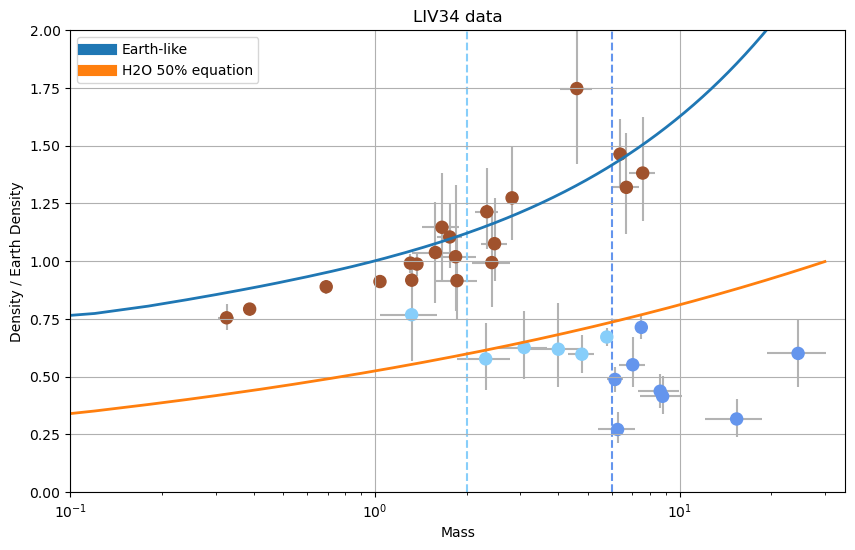

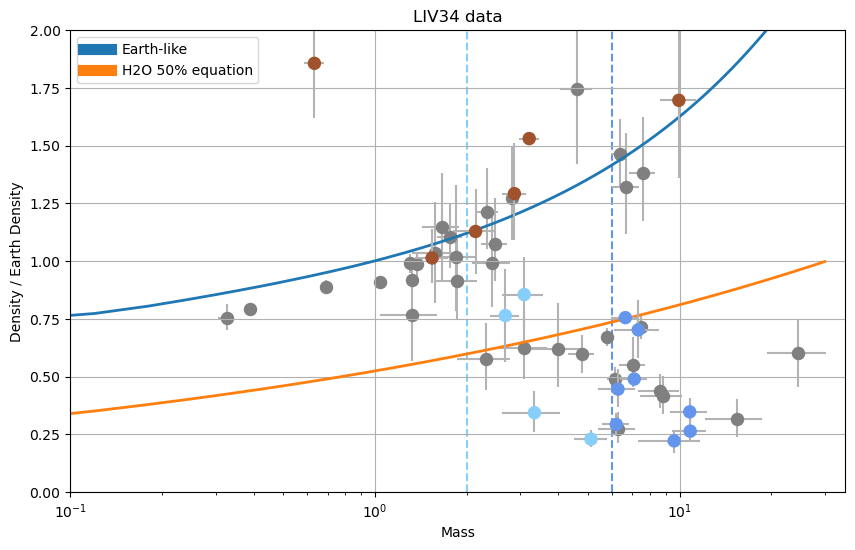

In [37]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Earth-like line data
earth_like_x = list(earth_like_rocky["Mass"])
earth_like_y = earth_like_rocky_density / earth_density

# H2O_50_calc line data
h2o_calc_x = masses_[1:500]
h2o_calc_y = [H20_50_calc_density/earth_density][0][1:500]

# Create spline interpolation functions for both lines
spline_earth_like = UnivariateSpline(earth_like_x, earth_like_y, s=0)
spline_h2o_calc = UnivariateSpline(h2o_calc_x, h2o_calc_y, s=0)

def find_closer_line(x, y):
    earth_like_distances = np.sqrt((spline_earth_like(x) - y)**2)
    h2o_calc_distances = np.sqrt((spline_h2o_calc(x) - y)**2)
    
    closer_lines = np.where(earth_like_distances < h2o_calc_distances, 0, 1)  # 0 for Earth-like, 1 for H2O_50_calc
    
    # Convert x to a NumPy array to perform element-wise comparison
    x = np.array(x)
    
    # Create a subcategory for H2O-labeled planets with radius > 4 and assign label 2
    h2o_labeled_mask = (x > 6) & (closer_lines == 1)
    closer_lines[h2o_labeled_mask] = 2
    
    return closer_lines


closer_lines = find_closer_line(mass, density/earth_density)

# Color code the data points
colors = ['Sienna' if label == 0 else 'lightskyblue' if label == 1 else 'cornflowerblue' for label in closer_lines]

# Plot Earth-like, H2O_50_calc, and H2O-labeled lines
x_values = np.linspace(0, 30, 500)  # Adjust the range as needed
earth_like_line = spline_earth_like(x_values)
h2o_calc_line = spline_h2o_calc(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, earth_like_line, label='Earth-like', linewidth=2)
plt.plot(x_values, h2o_calc_line, label='H2O 50% equation', linewidth=2)


mass_err            = [np.abs(mass_low),mass_up]
density_err         = [np.abs(density_low)/earth_density,density_up/earth_density]
# Plot data points, color-coded based on the three categories
plt.scatter(mass, density/earth_density, c=colors,s=75)
plt.errorbar(mass, density/earth_density,xerr = mass_err,yerr = density_err,fmt='.', color='0.7',zorder=-32)

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,2), plt.xlim(0.1,35)
plt.vlines(2,0,2,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,2,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)

plt.ylabel('Density / Earth Density')
plt.legend()
plt.grid(True)
plt.title('LIV34 data')
leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

closer_lines = find_closer_line(mass2, density2/earth_density)

# Color code the data points
colors = ['Sienna' if label == 0 else 'lightskyblue' if label == 1 else 'cornflowerblue' for label in closer_lines]

plt.figure(figsize=(10, 6))
plt.plot(x_values, earth_like_line, label='Earth-like', linewidth=2)
plt.plot(x_values, h2o_calc_line, label='H2O 50% equation', linewidth=2)

mass_err2            = [np.abs(mass_low2),mass_up2]
density_err2         = [np.abs(density_low2)/earth_density,density_up2/earth_density]
# Plot data points, color-coded based on the three categories
plt.scatter(mass2, density2/earth_density, c=colors,s=75,zorder = 3)
plt.errorbar(mass2, density2/earth_density,xerr = mass_err2,yerr = density_err2,fmt='.', color='0.7',zorder=2)

plt.scatter(mass, density/earth_density,color = "grey", s=75,zorder = 1.5)
plt.errorbar(mass, density/earth_density,xerr = mass_err,yerr = density_err,fmt='.', color='0.7',zorder=1.2)

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,4), plt.xlim(0,40)
plt.vlines(2,0,2,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,2,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)
plt.ylim(0,2), plt.xlim(0.1,35)
plt.ylabel('Density / Earth Density')
plt.legend()
plt.grid(True)
plt.title('LIV34 data')
leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)


(array([2., 0., 2., 1., 2., 4., 2., 2., 1., 2., 2., 5., 2., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1.]),
 array([0.27115452, 0.33532327, 0.39949202, 0.46366077, 0.52782953,
        0.59199828, 0.65616703, 0.72033578, 0.78450453, 0.84867329,
        0.91284204, 0.97701079, 1.04117954, 1.10534829, 1.16951705,
        1.2336858 , 1.29785455, 1.3620233 , 1.42619205, 1.49036081,
        1.55452956, 1.61869831, 1.68286706, 1.74703581]),
 <BarContainer object of 23 artists>)

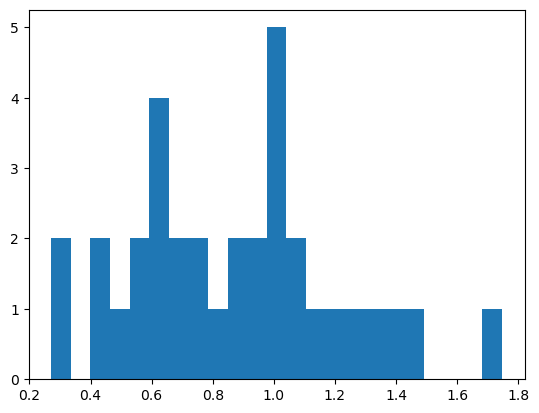

In [17]:
plt.hist(density/earth_density,bins = 23)

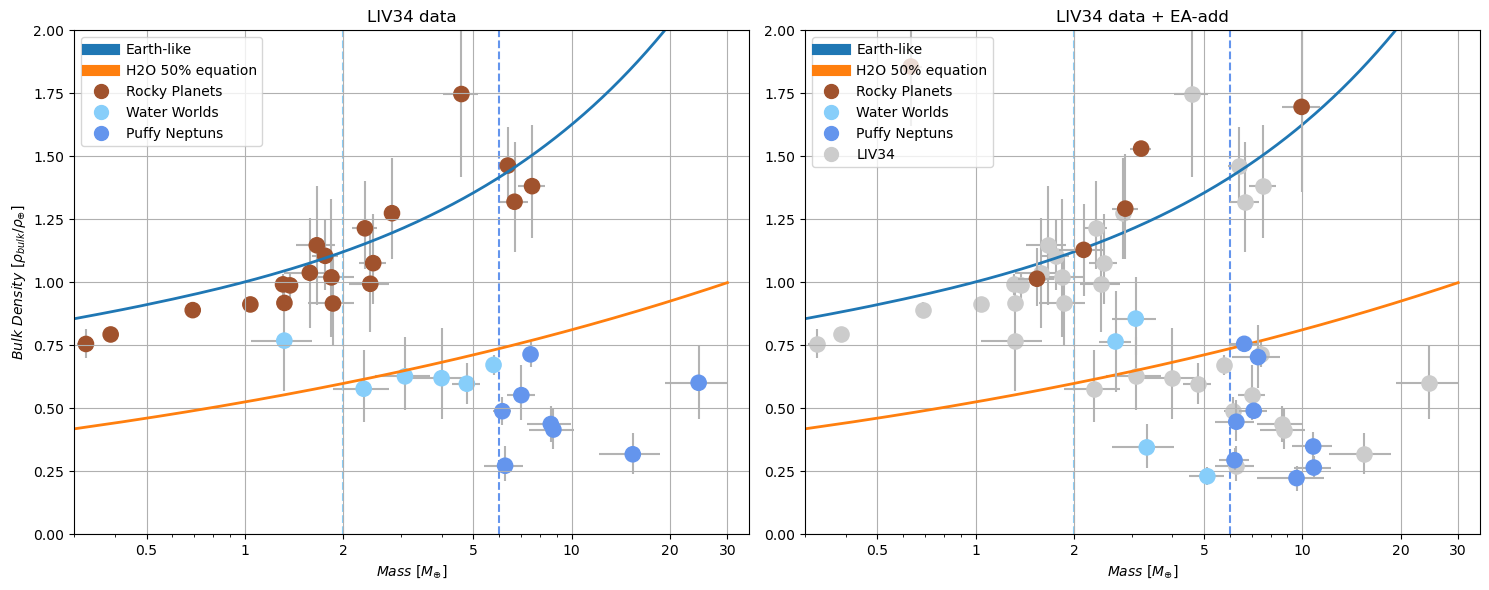

In [9]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# Create a single figure with a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1 - Left
# Earth-like line data
earth_like_x = list(earth_like_rocky["Mass"])
earth_like_y = earth_like_rocky_density / earth_density

# H2O_50_calc line data
h2o_calc_x = masses_[1:500]
h2o_calc_y = [H20_50_calc_density/earth_density][0][1:500]

# Create spline interpolation functions for both lines
spline_earth_like = UnivariateSpline(earth_like_x, earth_like_y, s=0)
spline_h2o_calc = UnivariateSpline(h2o_calc_x, h2o_calc_y, s=0)

closer_lines = find_closer_line(mass, density/earth_density)

# Color code the data points
colors = ['Sienna' if label == 0 else 'lightskyblue' if label == 1 else 'cornflowerblue' for label in closer_lines]

# Plot Earth-like, H2O_50_calc, and H2O-labeled lines
x_values = np.linspace(0, 30, 500)  # Adjust the range as needed
earth_like_line = spline_earth_like(x_values)
h2o_calc_line = spline_h2o_calc(x_values)

axes[0].plot(x_values, earth_like_line, label='Earth-like', linewidth=2)
axes[0].plot(x_values, h2o_calc_line, label='H2O 50% equation', linewidth=2)

mass_err = [np.abs(mass_low), mass_up]
density_err = [np.abs(density_low)/earth_density, density_up/earth_density]
axes[0].plot(100,100,".",color = 'Sienna',label = "Rocky Planets")
axes[0].plot(100,100,".",color = 'lightskyblue',label = "Water Worlds")
axes[0].plot(100,100,".",color = 'cornflowerblue',label = "Puffy Neptuns")
# Plot data points, color-coded based on the three categories
axes[0].scatter(mass, density/earth_density, c=colors, s=120)
axes[0].errorbar(mass, density/earth_density, xerr=mass_err, yerr=density_err, fmt='.', color='0.7', zorder=-32)
axes[0].set_ylim(0, 2)
axes[0].set_xlim(0.3, 35)
axes[0].vlines(2, 0, 2, colors="lightskyblue", linestyle="dashed", zorder=-32)
axes[0].vlines(6, 0, 2, colors="cornflowerblue", linestyle="dashed", zorder=-32)

axes[0].set_xlabel("$Mass\ [M_{\oplus}]$")
axes[0].set_ylabel("$Bulk\ Density\ [ρ_{bulk}/ρ_{\oplus}]$")
axes[0].set_xscale("log")
axes[0].set_title('LIV34 data')
axes[0].legend()
axes[0].grid(True)
axes[0].set_xticks([0.5, 1, 2, 5, 10, 20, 30])
axes[0].set_xticklabels(["0.5", "1", "2", "5", "10", "20", "30"])
closer_lines = find_closer_line(mass2, density2/earth_density)
# Change the line width and marker size for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(10)  # Adjust the marker size as needed

# Color code the data points
colors = ['Sienna' if label == 0 else 'lightskyblue' if label == 1 else 'cornflowerblue' for label in closer_lines]

# Create a new set of x-values for the second subplot
x_values = np.linspace(0, 30, 500)  # Adjust the range as needed
earth_like_line = spline_earth_like(x_values)
h2o_calc_line = spline_h2o_calc(x_values)

axes[1].plot(x_values, earth_like_line, label='Earth-like', linewidth=2)
axes[1].plot(x_values, h2o_calc_line, label='H2O 50% equation', linewidth=2)
axes[1].plot(100,100,".",color = 'Sienna',label = "Rocky Planets")
axes[1].plot(100,100,".",color = 'lightskyblue',label = "Water Worlds")
axes[1].plot(100,100,".",color = 'cornflowerblue',label = "Puffy Neptuns")
axes[1].plot(100,100,".",color = "0.8",label = "LIV34")

mass_err2 = [np.abs(mass_low2), mass_up2]
density_err2 = [np.abs(density_low2)/earth_density, density_up2/earth_density]

# Plot data points, color-coded based on the three categories
axes[1].scatter(mass2, density2/earth_density, c=colors, s=120, zorder=3)
axes[1].errorbar(mass2, density2/earth_density, xerr=mass_err2, yerr=density_err2, fmt='.', color='0.7', zorder=2)

axes[1].scatter(mass, density/earth_density, color="0.8", s=120, zorder=1.5)
axes[1].errorbar(mass, density/earth_density, xerr=mass_err, yerr=density_err, fmt='.', color='0.7', zorder=1.2)

axes[1].set_xlabel("$Mass\ [M_{\oplus}]$")
axes[1].set_xscale("log")
axes[1].set_ylim(0, 2)
axes[1].set_xlim(0.3, 35)
axes[1].vlines(2, 0, 2, colors="lightskyblue", linestyle="dashed", zorder=-32)
axes[1].vlines(6, 0, 2, colors="cornflowerblue", linestyle="dashed", zorder=-32)
axes[1].legend()
axes[1].grid(True)
axes[1].set_title('LIV34 data + EA-add')
axes[1].set_xticks([0.5, 1, 2, 5, 10, 20, 30])
axes[1].set_xticklabels(["0.5", "1", "2", "5", "10", "20", "30"])
# Adjust the layout and display the plot
leg = axes[0].legend()

# Change the line width and marker size for the legend in axes[0]
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

leg = axes[1].legend()

# Change the line width and marker size for the legend in axes[0]
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))

# Subplot 1
plt.subplot(1, 2, 1)
lower_err1 = np.abs(density_low) / earth_density
upper_err1 = density_up / earth_density
weights1 = 1.0 / np.sqrt((lower_err1 ** 2 + upper_err1 ** 2))

lower_err2 = np.abs(density_low+density_low2) / earth_density
upper_err2 = (density_up+density_up2)/ earth_density
lower_err2 = np.nan_to_num(lower_err2, nan=20)
upper_err2 = np.nan_to_num(upper_err2, nan=20)
weights2 = 1.0 / np.sqrt(( (lower_err2)** 2 + upper_err2 ** 2))
bins = np.linspace(0, 1.5, 23)
plt.hist(density/earth_density, bins=bins, color='green', alpha=0.4, rwidth=0.9, density=True, weights=weights1)
plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LIV34')

# Subplot 2
plt.subplot(1, 2, 2)
bins = np.linspace(0, 1.5, 23)
plt.hist((density+density2)/earth_density, bins=bins, color='green', alpha=0.4, rwidth=0.9, density=True,weights=weights2)
plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LIV34 + EA-add')

plt.show()

# Subplot 3
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
data_points_x = np.array(mass)
data_points_y = np.array((density) / earth_density)
closer_lines = find_closer_line(data_points_x, data_points_y)

earth_like_mask = closer_lines == 0
h2o_50_calc_mask = closer_lines == 1
h2o_labeled_mask = closer_lines == 2

earth_like_data = data_points_y[earth_like_mask]
h2o_50_calc_data = data_points_y[h2o_50_calc_mask]
h2o_labeled_data = data_points_y[h2o_labeled_mask]

weightRP = 1.0 / np.sqrt((np.array(density_low)[earth_like_mask] ** 2 + np.array(density_up)[earth_like_mask] ** 2))
weightWW = 1.0 / np.sqrt((np.array(density_low)[h2o_50_calc_mask] ** 2 + np.array(density_up)[h2o_50_calc_mask] ** 2))
weightPN = 1.0 / np.sqrt((np.array(density_low)[h2o_labeled_mask] ** 2 + np.array(density_up)[h2o_labeled_mask] ** 2))

bins = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

mu = np.average(earth_like_data, weights=weightRP)
sigma = np.sqrt(np.cov(earth_like_data, aweights=weightRP, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(h2o_50_calc_data, weights=weightWW)
sigma = np.sqrt(np.cov(h2o_50_calc_data, aweights=weightWW, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu = np.average(h2o_labeled_data, weights=weightPN)
sigma = np.sqrt(np.cov(h2o_labeled_data, aweights=weightPN, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)

plt.hist(earth_like_data, bins=bins, color='sienna', alpha=0.6, rwidth=0.9, density=True,weights = weightRP)
plt.hist(h2o_50_calc_data, bins=bins, color='lightskyblue', alpha=0.6, rwidth=0.9, density=True,weights = weightWW)
plt.hist(h2o_labeled_data, bins=bins, color='cornflowerblue', alpha=0.6, rwidth=0.9, density=True,weights = weightPN)

leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LIV34')

# Subplot 4
plt.subplot(1,2, 2)
data_points_x = np.array(mass + mass2)
data_points_y = np.array((density + density2) / earth_density)
closer_lines = find_closer_line(data_points_x, data_points_y)

earth_like_mask = closer_lines == 0
h2o_50_calc_mask = closer_lines == 1
h2o_labeled_mask = closer_lines == 2

earth_like_data = data_points_y[earth_like_mask]
h2o_50_calc_data = data_points_y[h2o_50_calc_mask]
h2o_labeled_data = data_points_y[h2o_labeled_mask]

weightRP = 1.0 / np.sqrt((np.array(density_low+density_low2)[earth_like_mask] ** 2 + np.array(density_up+density_up2)[earth_like_mask] ** 2))
weightRP = np.nan_to_num(weightRP, nan=0.1)
weightWW = 1.0 / np.sqrt((np.array(density_low+density_low2)[h2o_50_calc_mask] ** 2 + np.array(density_up+density_up2)[h2o_50_calc_mask] ** 2))
weightPN = 1.0 / np.sqrt((np.array(density_low+density_low2)[h2o_labeled_mask] ** 2 + np.array(density_up+density_up2)[h2o_labeled_mask] ** 2))
weightPN = np.nan_to_num(weightPN, nan=0.1)

bins = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

plt.hist(earth_like_data, bins=bins, color='sienna', alpha=0.6, rwidth=0.9, density=True,weights = weightRP)
plt.hist(h2o_50_calc_data, bins=bins, color='lightskyblue', alpha=0.6, rwidth=0.9, density=True,weights = weightWW)
plt.hist(h2o_labeled_data, bins=bins, color='cornflowerblue', alpha=0.6, rwidth=0.9, density=True,weights = weightPN)

mu = np.average(earth_like_data, weights=weightRP)
sigma = np.sqrt(np.cov(earth_like_data, aweights=weightRP, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(h2o_50_calc_data, weights=weightWW)
sigma = np.sqrt(np.cov(h2o_50_calc_data, aweights=weightWW, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu = np.average(h2o_labeled_data, weights=weightPN)
sigma = np.sqrt(np.cov(h2o_labeled_data, aweights=weightPN, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)

leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LIV34 + EA-add')
plt.show()

In [ ]:
def find_closer_line2(x, y):
    earth_like_distances = np.sqrt((spline_earth_like(x) - y)**2)
    h2o_calc_distances = np.sqrt((spline_h2o_calc(x) - y)**2)
    
    closer_lines = np.where(earth_like_distances < h2o_calc_distances, 0, 1)  # 0 for Earth-like, 1 for H2O_50_calc
    return closer_lines
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
data_points_x = np.array(mass)
data_points_y = np.array((density) / earth_density)
closer_lines = find_closer_line2(data_points_x, data_points_y)

earth_like_mask  = closer_lines == 0
h2o_labeled_mask = closer_lines == 1


earth_like_data = data_points_y[earth_like_mask]
h2o_labeled_data = data_points_y[h2o_labeled_mask]

weightRP = 1.0 / np.sqrt((np.array(density_low)[earth_like_mask] ** 2 + np.array(density_up)[earth_like_mask] ** 2))
weightPN = 1.0 / np.sqrt((np.array(density_low)[h2o_labeled_mask] ** 2 + np.array(density_up)[h2o_labeled_mask] ** 2))

bins = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

mu = np.average(earth_like_data, weights=weightRP)
sigma = np.sqrt(np.cov(earth_like_data, aweights=weightRP, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(h2o_labeled_data, weights=weightPN)
sigma = np.sqrt(np.cov(h2o_labeled_data, aweights=weightPN, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)

plt.hist(earth_like_data, bins=bins, color='sienna', alpha=0.6, rwidth=0.9, density=True,weights = weightRP)
plt.hist(h2o_labeled_data, bins=bins, color='cornflowerblue', alpha=0.6, rwidth=0.9, density=True,weights = weightPN)

leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LIV34')

# Subplot 4
plt.subplot(1,2, 2)
data_points_x = np.array(mass + mass2)
data_points_y = np.array((density + density2) / earth_density)
closer_lines = find_closer_line2(data_points_x, data_points_y)

earth_like_mask  = closer_lines == 0
h2o_labeled_mask = closer_lines == 1

earth_like_data = data_points_y[earth_like_mask]
h2o_50_calc_data = data_points_y[h2o_50_calc_mask]
h2o_labeled_data = data_points_y[h2o_labeled_mask]

weightRP = 1.0 / np.sqrt((np.array(density_low+density_low2)[earth_like_mask] ** 2 + np.array(density_up+density_up2)[earth_like_mask] ** 2))
weightRP = np.nan_to_num(weightRP, nan=0.1)
weightPN = 1.0 / np.sqrt((np.array(density_low+density_low2)[h2o_labeled_mask] ** 2 + np.array(density_up+density_up2)[h2o_labeled_mask] ** 2))
weightPN = np.nan_to_num(weightPN, nan=0.1)

bins = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)

plt.hist(earth_like_data, bins=bins, color='sienna', alpha=0.6, rwidth=0.9, density=True,weights = weightRP)
plt.hist(h2o_labeled_data, bins=bins, color='cornflowerblue', alpha=0.6, rwidth=0.9, density=True,weights = weightPN)

mu = np.average(earth_like_data, weights=weightRP)
sigma = np.sqrt(np.cov(earth_like_data, aweights=weightRP, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(h2o_labeled_data, weights=weightPN)
sigma = np.sqrt(np.cov(h2o_labeled_data, aweights=weightPN, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)

leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: STPMs LIV34 + EA-add')
plt.show()

In [ ]:
plot_planets = True
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq = liv34(planet_name_EA)

num_samples = 30
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

radii = []; masses = []; densitys = []
for i in range(0,len(mass)):
    mean_mass = mass[i]; mass_lower_err = np.abs(mass_low[i]);  mass_upper_err = mass_up[i]
    mean_density = np.divide(density,earth_density)[i]; 
    density_lower_err = np.divide(np.abs(density_low[i]),earth_density);  
    density_upper_err = np.divide(density_up,earth_density)[i]

    # Number of posterior samples to generate
    mass_samples = np.random.normal(mean_mass, (mass_lower_err + mass_upper_err) / 2, num_samples)
    masses.append(mass_samples)
    density_samples = np.random.normal(mean_density, (density_lower_err + density_upper_err) / 2, num_samples)
    densitys.append(density_samples)

masses_flattened = [item for sublist in masses for item in sublist]
radii_flattened = [item for sublist in radii for item in sublist]
densitys_flattened = [item for sublist in densitys for item in sublist]

# Create a 2D density colormap plot using KDE
sns.kdeplot(x =masses_flattened,y=densitys_flattened, fill=True)
plt.plot(100,100,label="Population",color = "cornflowerblue")
mass_err         = [np.abs(mass_low),mass_up]
density_err      = [np.divide(np.abs(density_low),earth_density),np.divide(density_up,earth_density)]
if plot_planets == True:
    plt.plot(mass,np.divide(density,earth_density),".",label = "Planets",color = "0.4",markersize = 13,zorder=10)
    plt.errorbar(mass,np.divide(density,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.8",zorder=1)

plt.title('LIV34 planets')
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log");
plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.grid(); plt.hlines(1,0,30,"grey",zorder = -30); 
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

mass_comb           = mass+mass2+mass3
mass_low_comb       = mass_low+mass_low2+mass_low3
mass_up_comb        = mass_up+mass_up2+mass_up3
density_comb        = density+density2+density3
density_low_comb    = density_low+density_low2+density_low3
density_up_comb     = density_up+density_up2+density_up3
plt.subplot(1, 2, 2)
radii = []; masses = []; densitys = []
for i in range(0,len(mass)):
    mean_mass = mass_comb[i]; mass_lower_err = np.abs(mass_low_comb[i]);  mass_upper_err = mass_up[i]
    mean_density = np.divide(density_comb,earth_density)[i]; 
    density_lower_err = np.divide(np.abs(density_low_comb[i]),earth_density);  
    density_upper_err = np.divide(density_up_comb,earth_density)[i]
    
    # Number of posterior samples to generate
    mass_samples = np.random.normal(mean_mass, (mass_lower_err + mass_upper_err) / 2, num_samples)
    masses.append(mass_samples)
    density_samples = np.random.normal(mean_density, (density_lower_err + density_upper_err) / 2, num_samples)
    densitys.append(density_samples)
    
masses_flattened = [item for sublist in masses for item in sublist]
radii_flattened = [item for sublist in radii for item in sublist]
densitys_flattened = [item for sublist in densitys for item in sublist]

# Create a 2D density colormap plot using KDE
sns.kdeplot(x =masses_flattened,y=densitys_flattened, fill=True)
plt.title('M type hosts, <4 Earth radii')
mass_err         = [np.abs(mass_low_comb),mass_up_comb]
density_err      = [np.divide(np.abs(density_low_comb),earth_density),np.divide(density_up_comb,earth_density)]
if plot_planets == True:
    plt.plot(mass_comb,np.divide(density_comb,earth_density),".",label = "Planets",color = "0.4",markersize = 13,zorder=10)
    plt.errorbar(mass_comb,np.divide(density_comb,earth_density),xerr = mass_err, yerr = density_err,fmt=".",color="0.8",zorder=1)

plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{Earth}]$"); plt.xscale("log");
plt.ylim(0,2); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False);
plt.grid(); plt.hlines(1,0,30,"grey",zorder = -30)
plt.plot(100,100,label="Population",color = "cornflowerblue")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

    
    
index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq = liv34(planet_name_EA)

num_samples = 30
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

radii = []; masses = []; densitys = []
for i in range(0,len(mass)):
    mean_mass   = mass[i]; mass_lower_err = np.abs(mass_low[i]);  mass_upper_err = mass_up[i]
    mean_radius = radius[i]; radius_lower_err = np.abs(radius_low[i]);  radius_upper_err = radius_up[i]

    # Number of posterior samples to generate
    mass_samples = np.random.normal(mean_mass, (mass_lower_err + mass_upper_err) / 2, num_samples)
    masses.append(mass_samples)
    radius_samples = np.random.normal(mean_radius, (radius_lower_err + radius_upper_err) / 2, num_samples)
    radii.append(radius_samples)

masses_flattened = [item for sublist in masses for item in sublist]
radii_flattened = [item for sublist in radii for item in sublist]

# Create a 2D density colormap plot using KDE
sns.kdeplot(x =masses_flattened,y=radii_flattened, fill=True)
mass_err         = [np.abs(mass_low),mass_up]
radius_err       = [np.abs(radius_low),radius_up]
if plot_planets == True:
    plt.plot(mass,radius,".",label = "Planets",color = "0.4",markersize = 13,zorder=10)
    plt.errorbar(mass,radius,xerr = mass_err, yerr = radius_err,fmt=".",color="0.8",zorder=1)
plt.plot(100,100,label="Population",color = "cornflowerblue")
plt.title('LIV34 planets')
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Radius\ [R_{\oplus}]$"); plt.xscale("log");
plt.ylim(0,4); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.grid(); plt.hlines(1,0,30,"grey",zorder = -30); 
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)

mass_comb           = mass+mass2+mass3
mass_low_comb       = mass_low+mass_low2+mass_low3
mass_up_comb        = mass_up+mass_up2+mass_up3
radius_comb         = radius+radius2+radius3
radius_low_comb     = radius_low+ radius_low2+ radius_low3
radius_up_comb     = radius_up+ radius_up2+ radius_up3


plt.subplot(1, 2, 2)
radii = []; masses = []; 
for i in range(0,len(mass)):
    mean_mass   = mass_comb[i]; mass_lower_err = np.abs(mass_low_comb[i]);  mass_upper_err = mass_up[i]
    mean_radius = radius_comb[i]; radius_lower_err = np.abs(radius_low_comb[i]);  radius_upper_err = radius_up[i]

    # Number of posterior samples to generate
    mass_samples = np.random.normal(mean_mass, (mass_lower_err + mass_upper_err) / 2, num_samples)
    masses.append(mass_samples)
    radius_samples = np.random.normal(mean_radius, (radius_lower_err + radius_upper_err) / 2, num_samples)
    radii.append(radius_samples)
    
masses_flattened = [item for sublist in masses for item in sublist]
radii_flattened = [item for sublist in radii for item in sublist]

# Create a 2D density colormap plot using KDE
sns.kdeplot(x =masses_flattened,y=radii_flattened, fill=True)
mass_err         = [np.abs(mass_low_comb),mass_up_comb]
radius_err       = [np.abs(radius_low_comb),radius_up_comb]
if plot_planets == True:
    plt.plot(mass_comb,radius_comb,".",label = "Planets",color = "0.4",markersize = 13,zorder=10)
    plt.errorbar(mass_comb,radius_comb,xerr = mass_err, yerr = radius_err,fmt=".",color="0.8",zorder=1)

plt.title('M type hosts, <4 Earth radii')
plt.xlabel("$Mass\ [M_{\oplus}]$"); plt.ylabel("$Radius\ [R_{\oplus}]$"); plt.xscale("log");
plt.ylim(0,4); plt.xlim(0.2,30); plt.xticks([0.5,1,2,5,10,20, 30],["0.5","1","2","5","10","20", "30"],minor=False); plt.grid(); plt.hlines(1,0,30,"grey",zorder = -30); 
plt.plot(100,100,label="Population",color = "cornflowerblue")
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(8.0)


In [ ]:
import scipy
from scipy import interpolate

def predict_radius(mass,radius):
    tck = interpolate.splrep(mass, radius)
    return interpolate.splev(mass, tck)

def calculate_density(exoplanet_mass, exoplanet_radius):
    return Earth_Mass*exoplanet_mass / (Earth_Volume*(exoplanet_radius**3))

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.subplot(2, 1, 1)  # 1 row, 2 columns, first subplot
radius_data = earth_like_rocky["Radius"]  
mass_data   = earth_like_rocky["Mass"]  # Mass data
earth_like_rocky_radius = []
earth_like_rocky_mass   = []
for i in range(0,len(mass_data)):
    if mass_data[i] < 35 and mass_data[i]> 0.1 :
        earth_like_rocky_radius.append(radius_data[i])
        earth_like_rocky_mass.append(mass_data[i])

x = earth_like_rocky_mass
y = earth_like_rocky_radius

plt.plot(x,y,"x",label = "Data")
plt.plot(x,predict_radius(x,y),label = "Fit")
plt.ylabel('Radius')
plt.xlabel('Mass')
plt.legend()

plt.subplot(2, 1, 2)  # 1 row, 2 columns, first subplot
plt.plot(x, (y-predict_radius(x,y))/y, "x",label = "Residuals")
plt.legend()
plt.grid(True)
plt.hlines(0,-5,35)
plt.xlabel('Mass')
plt.ylabel('(true - model)/true')
plt.xscale("log")
plt.xlim(-0.2,30)
plt.show()

